In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out) #creating new column called label with the last 5 rows are nan
    X = np.array(df[[forecast_col]]) #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method

    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X[:-forecast_out], y[:-forecast_out], test_size=test_size, random_state=0) #cross validation

    response = [X_train,X_test , Y_train, Y_test , X_lately]
    return response


In [3]:
df = pd.read_csv("tesla ML redq1.csv")


df = df.dropna()

df.head()
df.count()


Exchange Date    608
Close            608
dtype: int64

In [4]:
forecast_col = 'Close'
forecast_out = 3
test_size = 0.3

In [5]:
X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in
learner = LinearRegression() #initializing linear regression model

learner.fit(X_train,Y_train)

LinearRegression()

In [6]:
score=learner.score(X_test,Y_test)#testing the linear regression model
forecast= learner.predict(X_lately) #set that will contain the forecasted data
response={}#creting json object
response['test_score']=score
response['forecast_set']=forecast

print(response)

{'test_score': 0.935010451082585, 'forecast_set': array([214.72222637, 205.25624716, 210.66945537])}


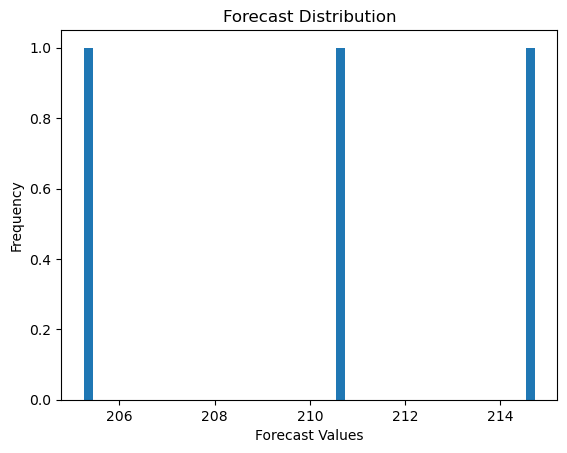

In [7]:
import matplotlib.pyplot as plt

plt.hist(forecast, bins=50)
plt.title('Forecast Distribution')
plt.xlabel('Forecast Values')
plt.ylabel('Frequency')
plt.show()

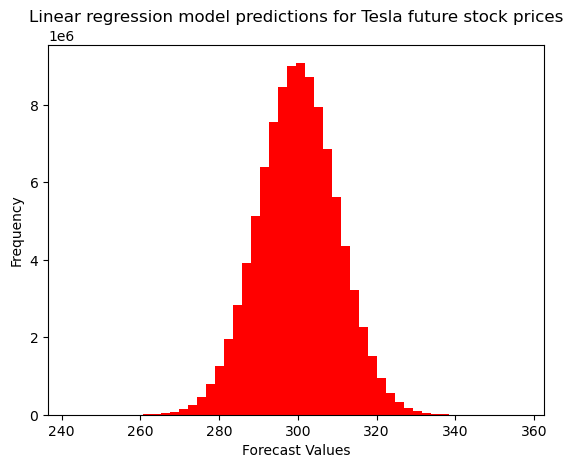

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the forecast distribution parameters (mean and standard deviation)
forecast_mean = 300
forecast_std = 10

# Generate 10,000,000 random samples from the forecast distribution
forecast = np.random.normal(loc=forecast_mean, scale=forecast_std, size=100000000)

# Plot the histogram of the forecast distribution
plt.hist(forecast, bins=50, color='red')
plt.title('Linear regression model predictions for Tesla future stock prices')
plt.xlabel('Forecast Values')
plt.ylabel('Frequency')
plt.show()
